https://github.com/storopoli/topic-modelling

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [2]:
def file_reader(file):
    pages = p.PdfFileReader(file)
    p_numbers = pages.getNumPages()
    text = ""
    
    for p_number in range(p_numbers):
        page = pages.getPage(p_number)
        text += page.extractText()
        
    return text

In [5]:
import PyPDF2 as p

text_fao = file_reader("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/FAO/FAO_result.pdf")



In [6]:
text_fao.lower()

'food security \n and nutrition \nin the world\nthe state of \nsafeguarding against \neconomic slowdowns \n and downturnsdemocratic republic of the congo.\n young woman selling fruit at a street market.\ncover photograph\n ©shutterstock/valeriya anufriyeva\nthis flagship publication is part of \nthe state of the world\n series of the food and agriculture organization of \nthe united nations.\nrequired citation:\nfao, ifad, unicef, wfp and who. 2019. \nthe state of food security and nutrition in the world 2019\n.  safeguarding against economic slowdowns and downturns\n. rome, fao.\nlicence: cc by-nc-sa 3.0 igo.\nthe designations employed and the presentation of material in this information product do not imply the expression of any \nopinion whatsoever on the part of the food and agriculture organization of the united nations (fao), the international \nfund for agricultural development (ifad), the united nations children™s fund (unicef), the world food programme \n(wfp) or the world hea

In [8]:
type(text_fao)

str

In [9]:
import spacy
from nltk.corpus import stopwords
sp = spacy.load('en_core_web_sm')

#stopwords = sp.Defaults.stop_words
#stopwords.words('english') + ('though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc','sa','igo','2019','2018')

from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc',
 'sa','igo','2019','2018','(',')','©Shutterstock/Valeriya','Anufriyeva','//creativecommons.org/licenses/by-nc-sa/3.0/igo','BY-NC-SA', 
'xACKNOWLEDGEMENTS', 'iii','%', '<',  '>', '*', 'n.r','insecurityTotalTotalTotalTotalTotal47.648.328.58.78.58.0|','//iresearch.worldbank.org/PovcalNet/home.aspx','ii', 'viiMETHODOLOGY' ]



In [10]:
type(text_fao)

str

In [11]:
Sent = nltk.word_tokenize(text_fao)
print(nltk.pos_tag(Sent))

[('FOOD', 'NNP'), ('SECURITY', 'NNP'), ('AND', 'NNP'), ('NUTRITION', 'NNP'), ('IN', 'NNP'), ('THE', 'NNP'), ('WORLD', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'NNP'), ('SAFEGUARDING', 'NNP'), ('AGAINST', 'NNP'), ('ECONOMIC', 'NNP'), ('SLOWDOWNS', 'NNP'), ('AND', 'NNP'), ('DOWNTURNSDEMOCRATIC', 'NNP'), ('REPUBLIC', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CONGO', 'NNP'), ('.', '.'), ('Young', 'NNP'), ('woman', 'NN'), ('selling', 'VBG'), ('fruit', 'NN'), ('at', 'IN'), ('a', 'DT'), ('street', 'NN'), ('market', 'NN'), ('.', '.'), ('COVER', 'NNP'), ('PHOTOGRAPH', 'NNP'), ('©Shutterstock/Valeriya', 'NNP'), ('Anufriyeva', 'NNP'), ('This', 'DT'), ('flagship', 'NN'), ('publication', 'NN'), ('is', 'VBZ'), ('part', 'NN'), ('of', 'IN'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('WORLD', 'NNP'), ('series', 'NN'), ('of', 'IN'), ('the', 'DT'), ('Food', 'NNP'), ('and', 'CC'), ('Agriculture', 'NNP'), ('Organization', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('United', 'NNP'), 

In [12]:
sent1 = nltk.pos_tag(Sent)

In [13]:
sent1[:30]

[('FOOD', 'NNP'),
 ('SECURITY', 'NNP'),
 ('AND', 'NNP'),
 ('NUTRITION', 'NNP'),
 ('IN', 'NNP'),
 ('THE', 'NNP'),
 ('WORLD', 'NNP'),
 ('THE', 'NNP'),
 ('STATE', 'NNP'),
 ('OF', 'NNP'),
 ('SAFEGUARDING', 'NNP'),
 ('AGAINST', 'NNP'),
 ('ECONOMIC', 'NNP'),
 ('SLOWDOWNS', 'NNP'),
 ('AND', 'NNP'),
 ('DOWNTURNSDEMOCRATIC', 'NNP'),
 ('REPUBLIC', 'NNP'),
 ('OF', 'IN'),
 ('THE', 'NNP'),
 ('CONGO', 'NNP'),
 ('.', '.'),
 ('Young', 'NNP'),
 ('woman', 'NN'),
 ('selling', 'VBG'),
 ('fruit', 'NN'),
 ('at', 'IN'),
 ('a', 'DT'),
 ('street', 'NN'),
 ('market', 'NN'),
 ('.', '.')]

In [14]:
nouns=[]
nouns = [word for (word, pos) in sent1 if (pos == 'NN' or pos == 'NNS')] 

In [15]:
nouns

['woman',
 'fruit',
 'street',
 'market',
 'flagship',
 'publication',
 'part',
 'series',
 'citation',
 'slowdowns',
 'downturns',
 'Licence',
 'designations',
 'presentation',
 'material',
 'information',
 'product',
 'expression',
 'opinion',
 'whatsoever',
 'part',
 'development',
 'status',
 'country',
 'territory',
 'city',
 'area',
 'authorities',
 'delimitation',
 'frontiers',
 'boundaries',
 'mention',
 'companies',
 'products',
 'manufacturers',
 'preference',
 'others',
 'nature',
 'designations',
 'presentation',
 'material',
 'maps',
 'expression',
 'opinion',
 'whatsoever',
 'part',
 'status',
 'country',
 'territory',
 'sea',
 'area',
 'delimitation',
 'frontiers',
 'precautions',
 'information',
 'publication',
 'material',
 'warranty',
 'kind',
 'responsibility',
 'interpretation',
 'use',
 'material',
 'reader',
 'event',
 'damages',
 'use',
 'rights',
 'work',
 'licence',
 'https',
 'terms',
 'licence',
 'work',
 'purposes',
 'work',
 'use',
 'work',
 'suggestion',
 

In [16]:

tokens_without_sw = [word for word in nouns if not word in stoplist]

print(tokens_without_sw)

['woman', 'fruit', 'street', 'market', 'flagship', 'publication', 'part', 'series', 'citation', 'slowdowns', 'downturns', 'Licence', 'designations', 'presentation', 'material', 'information', 'product', 'expression', 'opinion', 'whatsoever', 'part', 'development', 'status', 'country', 'territory', 'city', 'area', 'authorities', 'delimitation', 'frontiers', 'boundaries', 'mention', 'companies', 'products', 'manufacturers', 'preference', 'others', 'nature', 'designations', 'presentation', 'material', 'maps', 'expression', 'opinion', 'whatsoever', 'part', 'status', 'country', 'territory', 'sea', 'area', 'delimitation', 'frontiers', 'precautions', 'information', 'publication', 'material', 'warranty', 'kind', 'responsibility', 'interpretation', 'use', 'material', 'reader', 'event', 'damages', 'use', 'rights', 'work', 'licence', 'terms', 'licence', 'work', 'purposes', 'work', 'use', 'work', 'suggestion', 'organization', 'products', 'services', 'use', 'logo', 'work', 'licence', 'translation',

In [17]:
from nltk import ngrams
#from nltk import bigrams, trigrams

In [15]:
#bigram=list(ngrams(tokens_without_sw,2))

In [16]:
#bigram

In [17]:
#trigram=list(ngrams(tokens_without_sw,3))

In [18]:
#trigram

In [19]:
#bigrams_trigrams = bigram + trigram
#print(bigrams_trigrams)

In [20]:
#type(bigrams_trigrams)

In [21]:
#bigrams_trigrams[:4]

In [18]:
# using list comprehension 
listToStr = ' '.join([str(elem) for elem in tokens_without_sw]) 
  
print(listToStr)

woman fruit street market flagship publication part series citation slowdowns downturns Licence designations presentation material information product expression opinion whatsoever part development status country territory city area authorities delimitation frontiers boundaries mention companies products manufacturers preference others nature designations presentation material maps expression opinion whatsoever part status country territory sea area delimitation frontiers precautions information publication material warranty kind responsibility interpretation use material reader event damages use rights work licence terms licence work purposes work use work suggestion organization products services use logo work licence translation work disclaimer citation translation content accuracy translation edition edition.ﬂAny mediation disputes licence accordance present force materials Users material work party tables figures images permission reuse permission copyright holder risk claims infr

https://www.pythonprogramming.in/generate-the-n-grams-for-the-given-sentence-using-nltk-or-textblob.html

In [19]:
from textblob import TextBlob
 
# Function to generate n-grams from sentences.
def extract_ngrams(listToStr, num):
    n_grams = TextBlob(listToStr).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

In [20]:
bigram= extract_ngrams(listToStr, 2)

In [21]:
bigram

['woman fruit',
 'fruit street',
 'street market',
 'market flagship',
 'flagship publication',
 'publication part',
 'part series',
 'series citation',
 'citation slowdowns',
 'slowdowns downturns',
 'downturns Licence',
 'Licence designations',
 'designations presentation',
 'presentation material',
 'material information',
 'information product',
 'product expression',
 'expression opinion',
 'opinion whatsoever',
 'whatsoever part',
 'part development',
 'development status',
 'status country',
 'country territory',
 'territory city',
 'city area',
 'area authorities',
 'authorities delimitation',
 'delimitation frontiers',
 'frontiers boundaries',
 'boundaries mention',
 'mention companies',
 'companies products',
 'products manufacturers',
 'manufacturers preference',
 'preference others',
 'others nature',
 'nature designations',
 'designations presentation',
 'presentation material',
 'material maps',
 'maps expression',
 'expression opinion',
 'opinion whatsoever',
 'whatsoeve

In [22]:
type(bigram)

list

In [23]:

trigram= extract_ngrams(listToStr, 3)

In [24]:
trigram

['woman fruit street',
 'fruit street market',
 'street market flagship',
 'market flagship publication',
 'flagship publication part',
 'publication part series',
 'part series citation',
 'series citation slowdowns',
 'citation slowdowns downturns',
 'slowdowns downturns Licence',
 'downturns Licence designations',
 'Licence designations presentation',
 'designations presentation material',
 'presentation material information',
 'material information product',
 'information product expression',
 'product expression opinion',
 'expression opinion whatsoever',
 'opinion whatsoever part',
 'whatsoever part development',
 'part development status',
 'development status country',
 'status country territory',
 'country territory city',
 'territory city area',
 'city area authorities',
 'area authorities delimitation',
 'authorities delimitation frontiers',
 'delimitation frontiers boundaries',
 'frontiers boundaries mention',
 'boundaries mention companies',
 'mention companies products',


In [25]:
bigrams_trigrams = bigram + trigram
print(bigrams_trigrams)

['woman fruit', 'fruit street', 'street market', 'market flagship', 'flagship publication', 'publication part', 'part series', 'series citation', 'citation slowdowns', 'slowdowns downturns', 'downturns Licence', 'Licence designations', 'designations presentation', 'presentation material', 'material information', 'information product', 'product expression', 'expression opinion', 'opinion whatsoever', 'whatsoever part', 'part development', 'development status', 'status country', 'country territory', 'territory city', 'city area', 'area authorities', 'authorities delimitation', 'delimitation frontiers', 'frontiers boundaries', 'boundaries mention', 'mention companies', 'companies products', 'products manufacturers', 'manufacturers preference', 'preference others', 'others nature', 'nature designations', 'designations presentation', 'presentation material', 'material maps', 'maps expression', 'expression opinion', 'opinion whatsoever', 'whatsoever part', 'part status', 'status country', 'c

In [26]:
type(bigrams_trigrams)

list

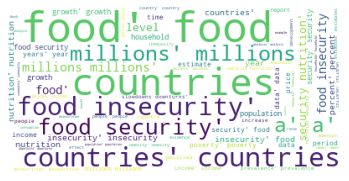

In [27]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(bigrams_trigrams))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [28]:

tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None)
tf = tf_vectorizer.fit_transform(bigrams_trigrams)
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

00  01  02  021  025  02730  028  029  03  030  ...  ﬁmeltdownﬂ  ﬁmore  \
0       0   0   0    0    0      0    0    0   0    0  ...           0      0   
1       0   0   0    0    0      0    0    0   0    0  ...           0      0   
2       0   0   0    0    0      0    0    0   0    0  ...           0      0   
3       0   0   0    0    0      0    0    0   0    0  ...           0      0   
4       0   0   0    0    0      0    0    0   0    0  ...           0      0   
...    ..  ..  ..  ...  ...    ...  ...  ...  ..  ...  ...         ...    ...   
52582   0   0   0    0    0      0    0    0   0    0  ...           0      0   
52583   0   0   0    0    0      0    0    0   0    0  ...           0      0   
52584   0   0   0    0    0      0    0    0   0    0  ...           0      0   
52585   0   0   0    0    0      0    0    0   0    0  ...           0      0   
52586   0   0   0    0    0      0    0    0   0    0  ...           0      0   

       ﬁnutrition  ﬁobesityﬂ  ﬁprevalence  ﬁtrade  ﬁtradeﬂ  ﬁzero  ﬁzeroﬂ  \
0               0          0            0       0        0      0       0   
1               0          0            0       0        0      0       0   
2               0          0            0       0        0      0       0   
3               0          0            0       0        0      0       0   
4               0          0            0       0        0      0       0   
...           ...        ...          ...     ...      ...    ...     ...   
52582           0          0            0       0        0      0       0   
52583           0          0            0       0        0      0       0   
52584           0          0            0       0        0      0       0   
52585           0          0            0       0        0      0       0   
52586           0          0            0       0        0      0       0   

       ﬂany  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
52582     0  
52583     0  
52584     0  
52585     0  
52586     0  

[52587 rows x 2935 columns]

In [29]:
lda_model = LatentDirichletAllocation(n_components=3, learning_method='batch', max_iter=5, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
food insecurity nutrition security data health downturns number prevalence level
Topic 1:
countries millions years income children obesity report world online country
Topic 2:
food growth percent poverty commodity prices people access women dependence


In [30]:
import pyLDAvis.sklearn


In [32]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]


PreparedData(topic_coordinates=                 x           y  topics  cluster       Freq
topic                                                     
0      -632.045471 -384.325073       1        1  34.934888
1     -1209.665405  212.164124       2        1  32.881014
2     -1437.453247 -586.322510       3        1  32.184098, topic_info=     Category         Freq        Term        Total  loglift  logprob
729   Default  3881.000000   countries  3881.000000  30.0000  30.0000
1194  Default  6223.000000        food  6223.000000  29.0000  29.0000
1817  Default  1667.000000   nutrition  1667.000000  28.0000  28.0000
1469  Default  1856.000000  insecurity  1856.000000  27.0000  27.0000
1291  Default  1512.000000      growth  1512.000000  26.0000  26.0000
...       ...          ...         ...          ...      ...      ...
2107   Topic3   217.699831  protection   271.264155   0.9137  -5.2925
1991   Topic3   304.440126  population   797.802740   0.1703  -4.9571
2206   Topic3   234.622852     regions   376.140007   0.6617  -5.2176
1069   Topic3   239.668810   estimates   800.821289  -0.0727  -5.1963
1435   Topic3   211.983136  inequality   643.969532   0.0226  -5.3191

[200 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
254       1  0.001233       access
254       2  0.040697       access
254       3  0.959452       access
289       2  0.996938  adolescents
293       1  0.990336        adult
...     ...       ...          ...
2880      2  0.998654        world
2880      3  0.001673        world
2900      1  0.001709        years
2900      2  0.997493        years
2900      3  0.000855        years

[329 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])